In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2 
from keras.layers import Dense, Flatten

In [5]:
# Define the paths to your image folders
train_path = 'C:\\Users\\LENOVO\\Downloads\\GurNum\\train'
val_path = 'C:\\Users\\LENOVO\\Downloads\\GurNum\\val'
 

In [8]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path


# Set the image size
img_size = (32, 32)

# Create empty lists for the images and labels
images = []
labels = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            # Append the image and label to the lists
            images.append(img)
            labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

In [13]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path

# Set the image size
img_size_val = (32, 32)

# Create empty lists for the images and labels
images_val = []
labels_val = []

# Loop over each folder from '0' to '9'
for label in range(10): 
    folder_path = os.path.join(data_dir_val, str(label))
   
    # Loop over each image in the folder
    for file in os.listdir(folder_path):            
        file_path = os.path.join(folder_path, file) 
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            # Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)

# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)

# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)
 

In [14]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


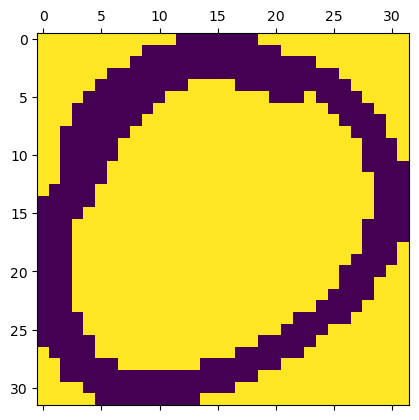

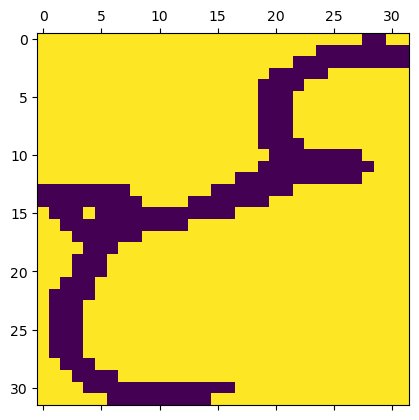

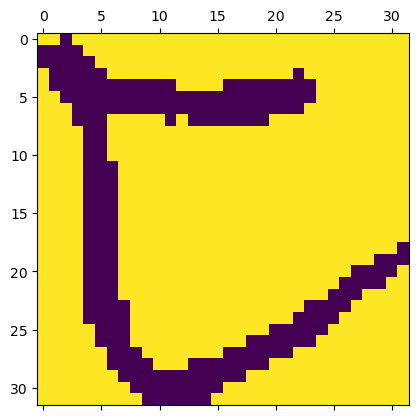

In [15]:
# test the images are loaded correctly

print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

In [16]:
# # flatten the dataset i.e, change 2D to 1D (skipped this , and flattened in the model)

# x_train_flat = x_train.reshape(len(x_train),32*32)
# x_test_flat = x_test.reshape(len(x_test),32*32)

# print(x_train_flat.shape)
# print(x_test_flat.shape)

# x_train_flat[0]

In [17]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')    
])

# compile the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test)) 

Epoch 1/10
32/32 [==============================] - 2s 20ms/step - loss: 169.1144 - accuracy: 0.3880 - val_loss: 67.6507 - val_accuracy: 0.5337
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 28.4940 - accuracy: 0.7790 - val_loss: 30.3894 - val_accuracy: 0.7640
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 14.7013 - accuracy: 0.8620 - val_loss: 23.1099 - val_accuracy: 0.8146
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 10.7911 - accuracy: 0.9070 - val_loss: 20.2396 - val_accuracy: 0.8090
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 7.6795 - accuracy: 0.9120 - val_loss: 33.6533 - val_accuracy: 0.7584
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 7.5247 - accuracy: 0.9240 - val_loss: 24.8351 - val_accuracy: 0.8539
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 4.3638 - accuracy: 0.9380 - val_loss: 19.3228 - val_accuracy: 0.8596
Epoch 8

In [18]:
# Observation : we see a better accuracy from the 2nd iteration

In [19]:
#  now scale and try to check the accuracy, divide dataset by 255 
 
x_train_scaled = x_train/255
x_test_scaled = x_test/255

model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 10ms/step - loss: 0.7854 - accuracy: 0.8770 - val_loss: 1.0774 - val_accuracy: 0.6854
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.8005 - accuracy: 0.8590 - val_loss: 1.0223 - val_accuracy: 0.7416
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7532 - accuracy: 0.8970 - val_loss: 0.9746 - val_accuracy: 0.8090
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7189 - accuracy: 0.9280 - val_loss: 0.9422 - val_accuracy: 0.8371
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.9600 - val_loss: 0.9202 - val_accuracy: 0.8708
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6765 - accuracy: 0.9710 - val_loss: 0.9031 - val_accuracy: 0.8933
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.9790 - val_loss: 0.8908 - val_accuracy: 0.9213
Epoch 8/10
32/32 [=

In [20]:
# Observation : we got better result for all iterations on scaling the training dataset

In [21]:
# evaluate test dataset

model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.8655 - accuracy: 0.9270


[0.865475058555603, 0.9269663095474243]

In [22]:
# Observation : result almost same as the training dataset, 

6/6 [==============================] - 0s 2ms/step
[0.94896454 0.5820763  0.79050386 0.32176018 0.69314516 0.79880035
 0.5252999  0.6917853  0.91165185 0.69313663]
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


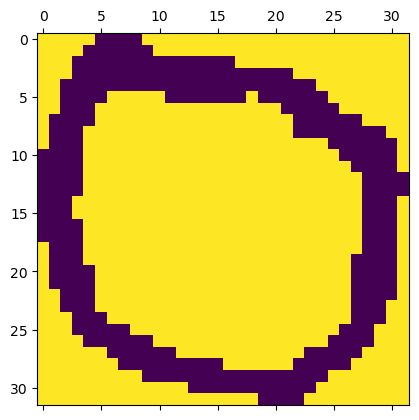

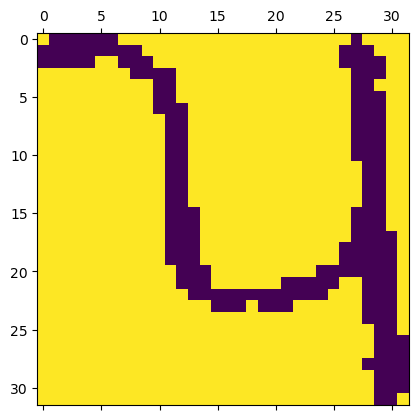

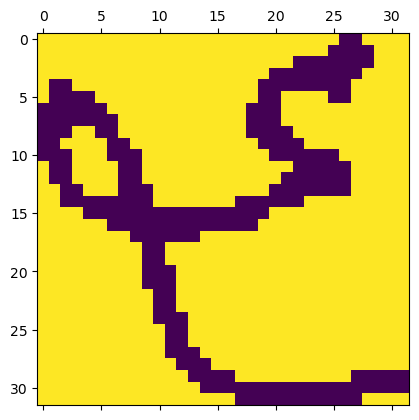

In [23]:
# predict 1st image 

plt.matshow(x_test[0])

y_predicted = model.predict(x_test_scaled)
print(y_predicted[0])

# this showing the 10 results for the input '0', we need to look for the value which is max

print('Predicted Value is ',np.argmax(y_predicted[0]))

# test some more values 

plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))

plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [24]:
# some predictions may not be not right

# build confusion matrix to see how our prediction looks like

# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]

print(y_predicted_labels, len(y_predicted_labels))

conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 1, 7, 7, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  1, 13,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 16,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

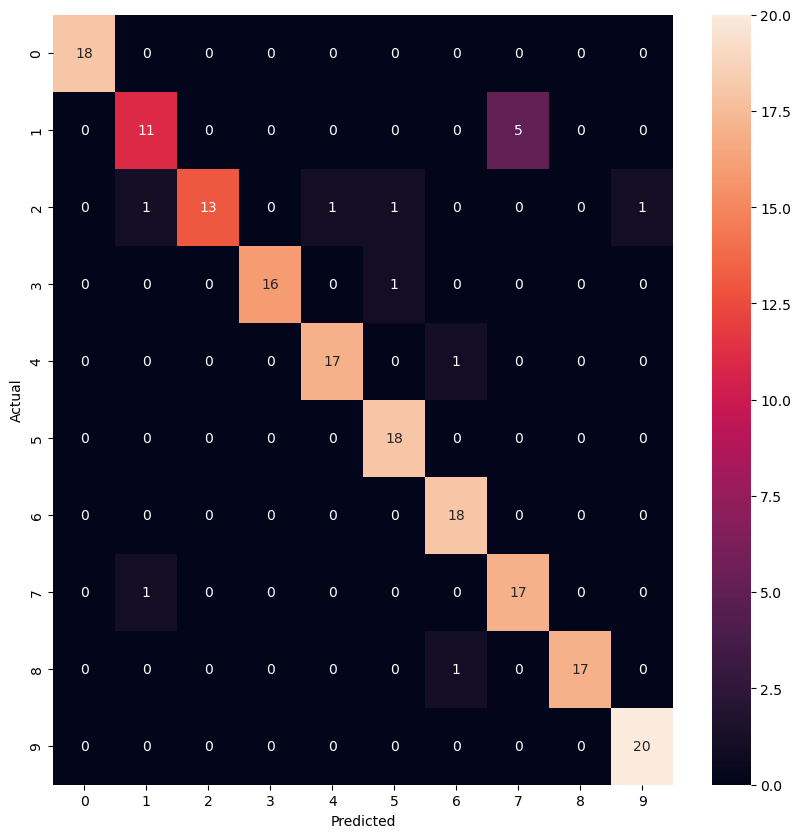

In [25]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [26]:
# here we can see there are some errors 
# we need to modify our nn, we add some layers in the above model and different activation function

In [27]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# compile the nn
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test)) 

Epoch 1/10
32/32 [==============================] - 2s 49ms/step - loss: 1.2020 - accuracy: 0.6590 - val_loss: 0.4557 - val_accuracy: 0.8820
Epoch 2/10
32/32 [==============================] - 1s 31ms/step - loss: 0.1840 - accuracy: 0.9410 - val_loss: 0.3032 - val_accuracy: 0.9157
Epoch 3/10
32/32 [==============================] - 1s 32ms/step - loss: 0.1139 - accuracy: 0.9640 - val_loss: 0.2569 - val_accuracy: 0.9551
Epoch 4/10
32/32 [==============================] - 1s 29ms/step - loss: 0.0655 - accuracy: 0.9830 - val_loss: 0.2475 - val_accuracy: 0.9101
Epoch 5/10
32/32 [==============================] - 1s 30ms/step - loss: 0.0594 - accuracy: 0.9830 - val_loss: 0.2062 - val_accuracy: 0.9326
Epoch 6/10
32/32 [==============================] - 1s 45ms/step - loss: 0.0340 - accuracy: 0.9970 - val_loss: 0.2309 - val_accuracy: 0.9382
Epoch 7/10
32/32 [==============================] - 1s 42ms/step - loss: 0.0612 - accuracy: 0.9800 - val_loss: 0.1889 - val_accuracy: 0.9438
Epoch 8/10
32

In [28]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier

# evaluate test dataset on modified model

model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.2087 - accuracy: 0.9438


[0.20866569876670837, 0.9438202381134033]

In [29]:
# Earlier we got  0.9213483333587646 now we got 0.9606741666793823 accuracy

# redo the confusion matrix 

# build confusion matrix to see how our prediction looks like

# convert to concrete values

y_predicted = model2.predict(x_test_scaled)
y_predicted[0]

y_predicted_labels=[np.argmax(i) for i in y_predicted]

print(y_predicted_labels, len(y_predicted_labels))

conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 6ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 3, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 13,  1,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

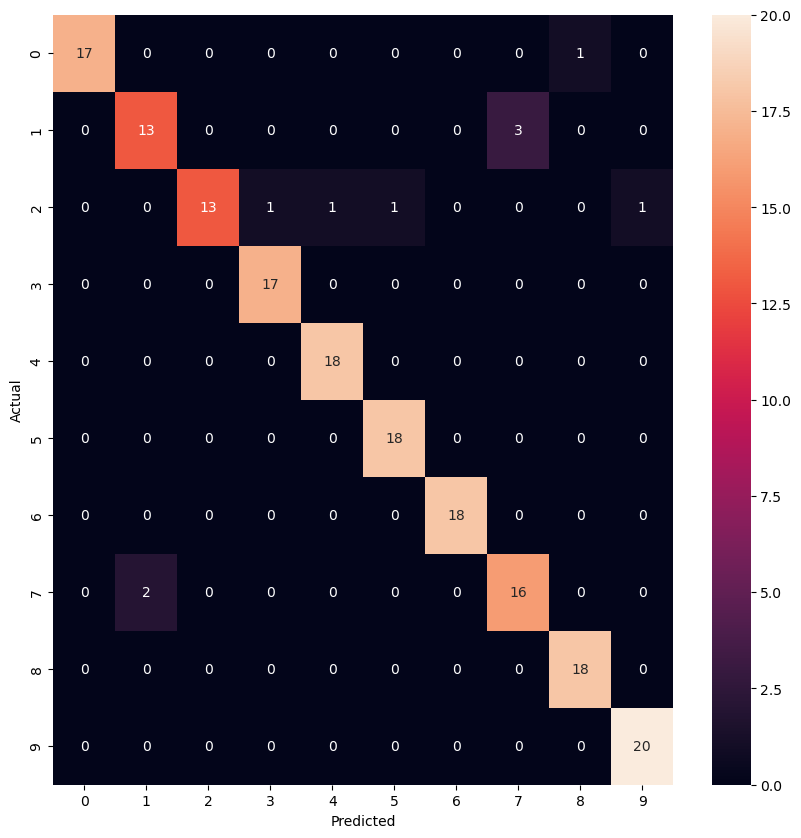

In [30]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
# Observatoin : we see in the updated model, there are less number of errors, 
# whatever is not in diagonal is a error

6/6 [==============================] - 0s 5ms/step - loss: 17.5412 - accuracy: 0.8933
Test accuracy: 0.8932584524154663


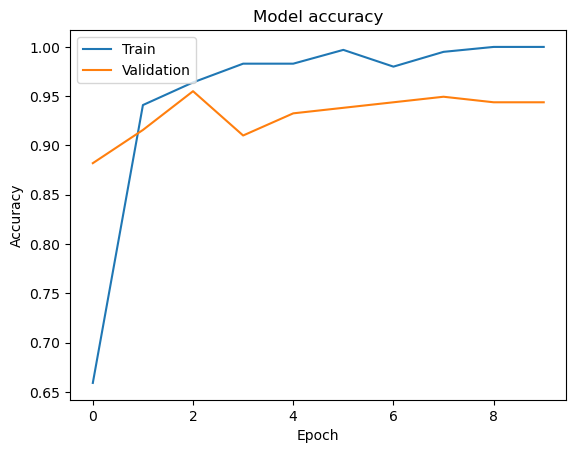

In [32]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()